In [3]:
library(tidyverse)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

## how do peoples health factos affect their chances at heart disease

In [73]:

set.seed(20)
project_data <- read_csv("https://raw.githubusercontent.com/yobrap/Dsci-Project/main/data/heart_disease/processed.cleveland.data", col_names = FALSE)

colnames(project_data) <- c("age", "sex", "cp","trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "num")

project_data <- mutate(project_data, num = as_factor(num)) 
project_data <- mutate(project_data, num = fct_recode(num, disease = "1",
                                 disease = "2", 
                                 disease = "3",
                                 disease = "4",
                                 clean = "0"))
project_data <- select(project_data, age, chol, trestbps, thalach, num)

head(project_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,chol,trestbps,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,233,145,150,clean
67,286,160,108,disease
67,229,120,129,disease
37,250,130,187,clean
41,204,130,172,clean
56,236,120,178,clean


In [85]:
# filter(project_data, age == "?" |
#        chol == "?" |
#        trestbps == "?" |
#        thalach == "?" |
#        num == "?" )

 filter(project_data, chol > 500 )


age,chol,trestbps,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,564,115,160,clean


# Graph 1

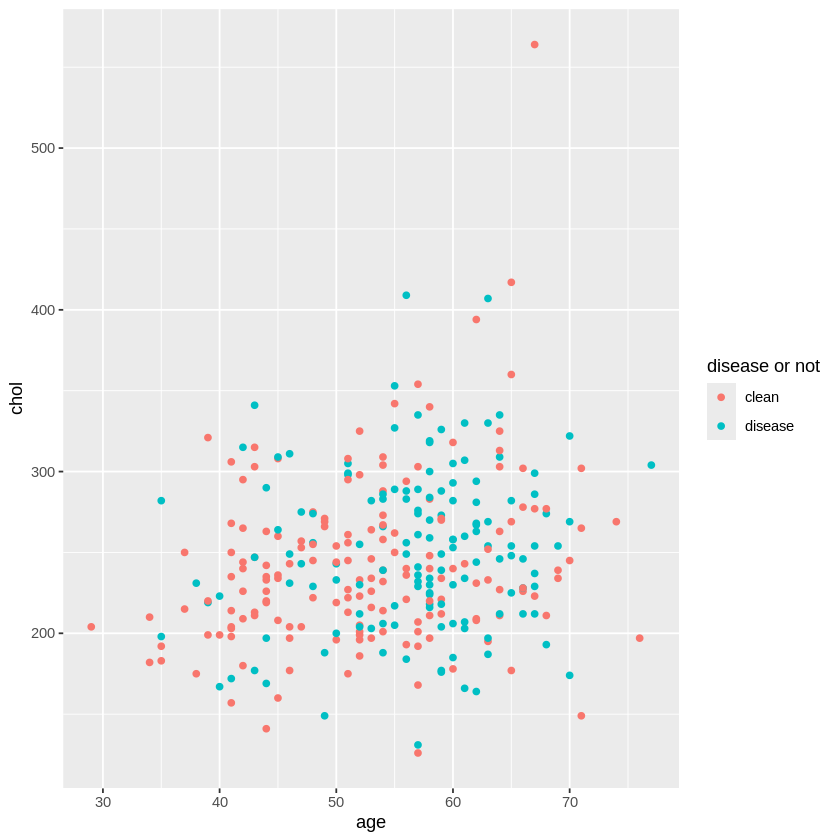

In [74]:
 project_graph <- ggplot(project_data, aes(x = age, y = chol, color = num)) + 
            geom_point() + 
            labs(x = "age", y = "chol", color = "disease or not")

project_graph
                  

higher your age more likely to have heart disease, higher cholestral you are also likely to have heart disease

# Graph 2

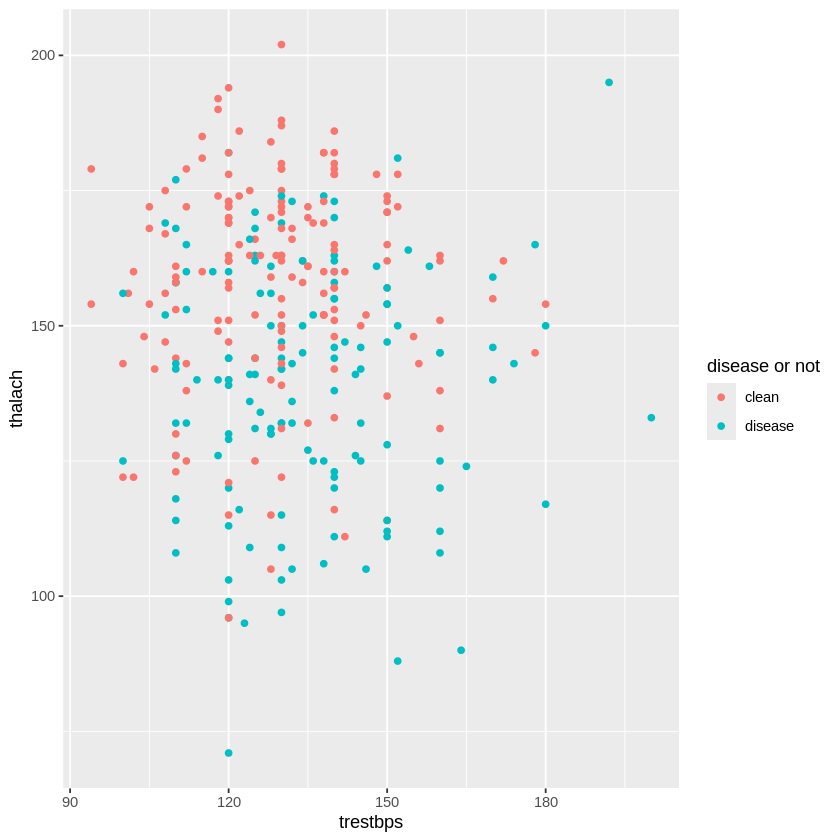

In [86]:
 project_graph <- ggplot(project_data, aes(x = trestbps, y = thalach, color = num)) + 
            geom_point() + 
            labs(x = "trestbps", y = "thalach", color = "disease or not")

project_graph

In [ ]:
higher trestbps the higher chance you will have disease, higher levels of thalach does not contribute to higher levels of heart diseaes.